<a href="https://colab.research.google.com/github/GitMishka/misc1/blob/master/data_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import psycopg2
import pandas as pd

pg_host = ""
pg_database = ""
pg_user = ""
pg_password = ""

conn = psycopg2.connect(
    dbname=pg_database,
    user=pg_user,
    password=pg_password,
    host=pg_host
)

df = pd.read_sql(f"SELECT * FROM motor_vehicle_collisions", conn)
conn.close()

total_accidents = df.shape[0]

accidents_by_borough = df['BOROUGH'].value_counts()

accidents_by_factor = df['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts()

print(f"Total number of accidents: {total_accidents}")
print(f"Number of accidents by borough: {accidents_by_borough}")
print(f"Number of accidents by contributing factor: {accidents_by_factor}")


<ipython-input-2-42d87ffe046c>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM motor_vehicle_collisions", conn)


Total number of accidents: 1997270
Number of accidents by borough: BROOKLYN         436019
QUEENS           368690
MANHATTAN        310600
BRONX            202966
STATEN ISLAND     57701
Name: BOROUGH, dtype: int64
Number of accidents by contributing factor: Unspecified                       687696
Driver Inattention/Distraction    395966
Failure to Yield Right-of-Way     117867
Following Too Closely             106093
Backing Unsafely                   74417
                                   ...  
Cell Phone (hand-held)                79
Windshield Inadequate                 77
Texting                               50
Listening/Using Headphones            24
1                                     10
Name: CONTRIBUTING_FACTOR_VEHICLE_1, Length: 61, dtype: int64


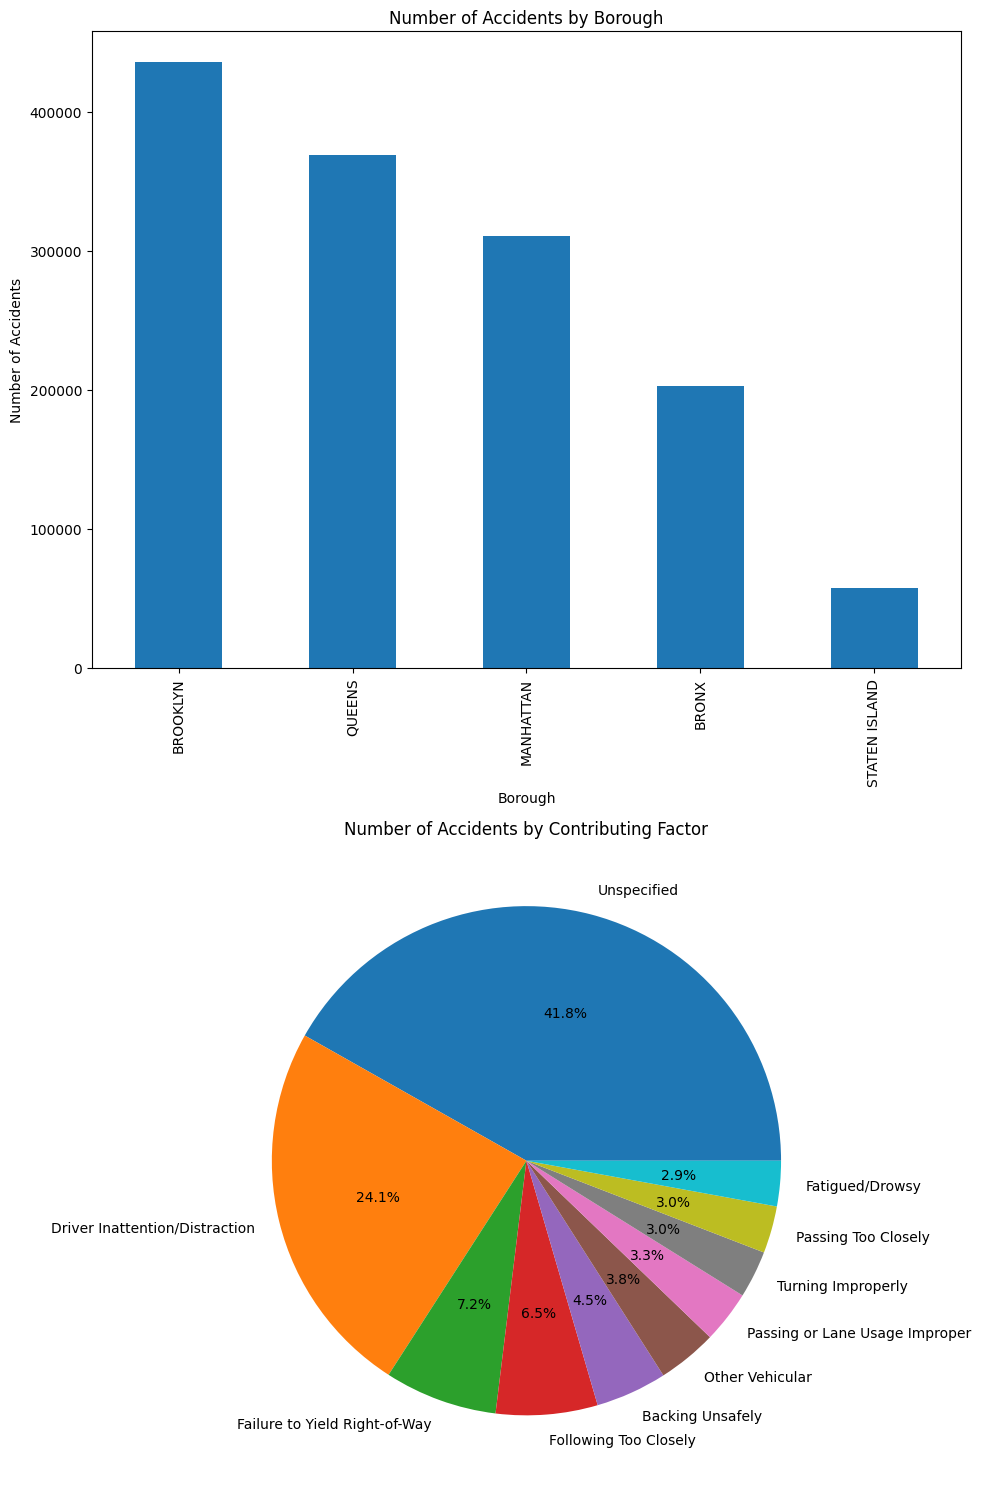

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

# Bar plot of accidents by borough
accidents_by_borough.plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of Accidents by Borough')
ax[0].set_xlabel('Borough')
ax[0].set_ylabel('Number of Accidents')

# Pie chart of accidents by contributing factor (show top 10 factors only)
accidents_by_factor[:10].plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('Number of Accidents by Contributing Factor')
ax[1].set_ylabel('')

# Show the figure
plt.tight_layout()
plt.show()


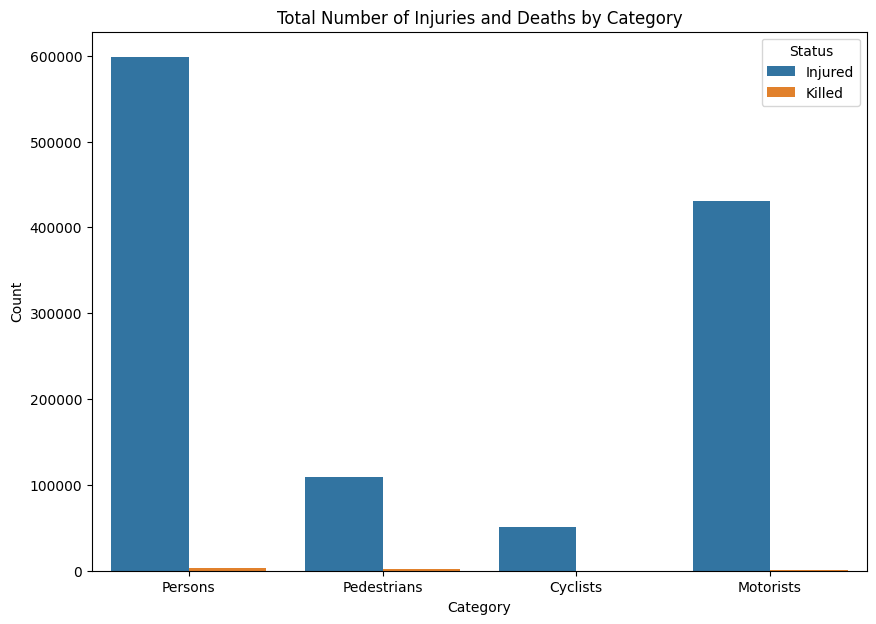

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
totals = pd.DataFrame({
    'Category': ['Persons', 'Pedestrians', 'Cyclists', 'Motorists'],
    'Injured': [
        df['NUMBER_OF_PERSONS_INJURED'].sum(),
        df['NUMBER_OF_PEDESTRIANS_INJURED'].sum(),
        df['NUMBER_OF_CYCLIST_INJURED'].sum(),
        df['NUMBER_OF_MOTORIST_INJURED'].sum()
    ],
    'Killed': [
        df['NUMBER_OF_PERSONS_KILLED'].sum(),
        df['NUMBER_OF_PEDESTRIANS_KILLED'].sum(),
        df['NUMBER_OF_CYCLIST_KILLED'].sum(),
        df['NUMBER_OF_MOTORIST_KILLED'].sum()
    ]
})

# Melt the dataframe to bring it into long format
totals_melted = pd.melt(totals, id_vars='Category', var_name='Status', value_name='Count')

# Create a bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Category', y='Count', hue='Status', data=totals_melted)
plt.title('Total Number of Injuries and Deaths by Category')
plt.show()

<ipython-input-5-6ccdbee7f7cc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough_totals = df.groupby('BOROUGH').sum()[['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED']]


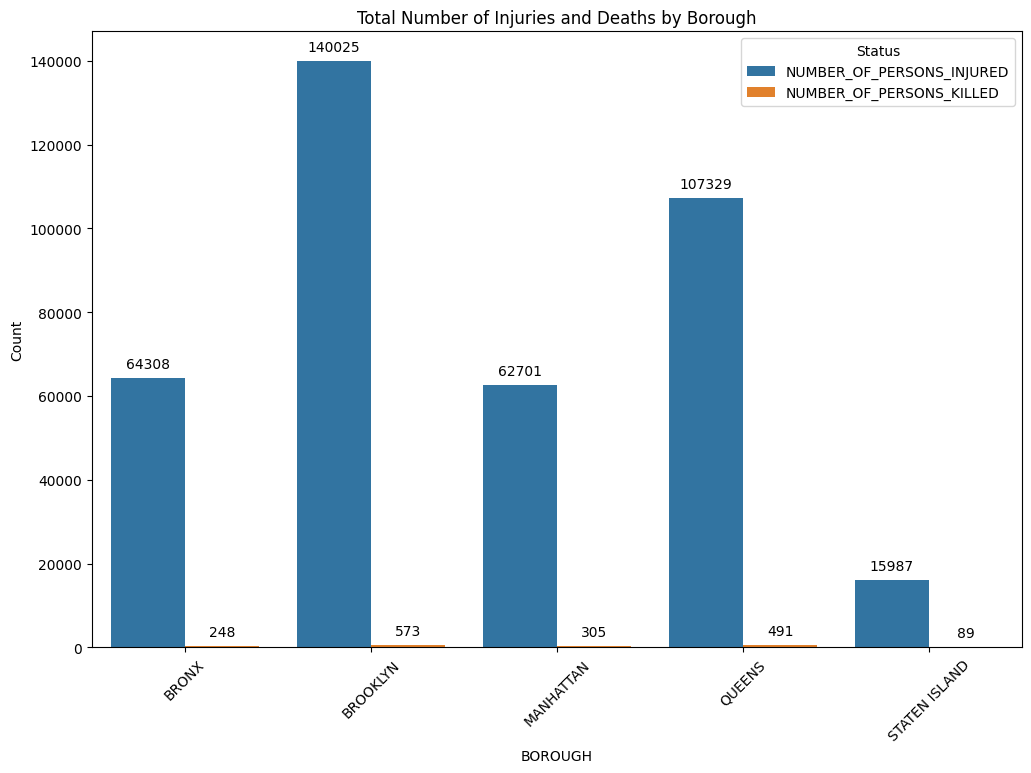

In [ ]:
borough_totals = df.groupby('BOROUGH').sum()[['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED']]

# Melt the dataframe to bring it into long format
borough_totals_melted = pd.melt(borough_totals.reset_index(), id_vars='BOROUGH', var_name='Status', value_name='Count')

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='BOROUGH', y='Count', hue='Status', data=borough_totals_melted)
plt.title('Total Number of Injuries and Deaths by Borough')
plt.xticks(rotation=45)

# Add counts on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()

               NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED
BOROUGH                                                           
BRONX                            64308.0                     248.0
BROOKLYN                        140025.0                     573.0
MANHATTAN                        62701.0                     305.0
QUEENS                          107329.0                     491.0
STATEN ISLAND                    15987.0                      89.0
                     NUMBER_OF_PERSONS_INJURED  NUMBER_OF_PERSONS_KILLED
VEHICLE_TYPE_CODE_1                                                     
''lime mope                                1.0                       0.0
.                                          0.0                       0.0
0                                          0.0                       0.0
1                                          0.0                       0.0
100th truc                                 0.0                       0.0
...                 

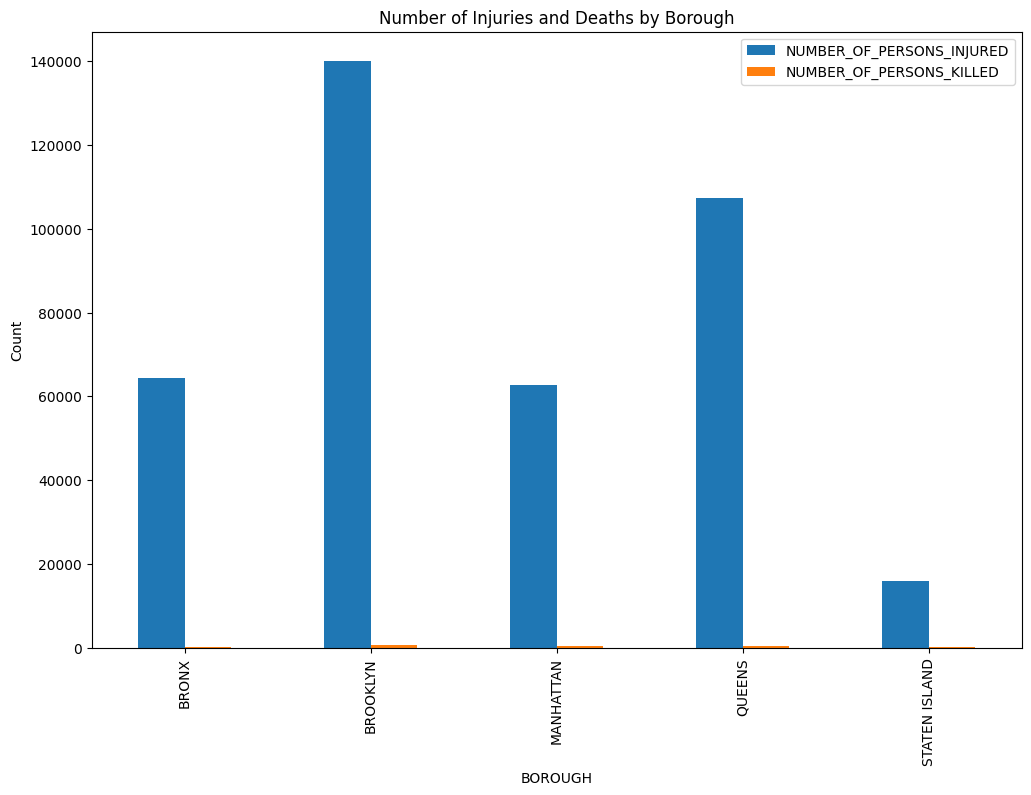

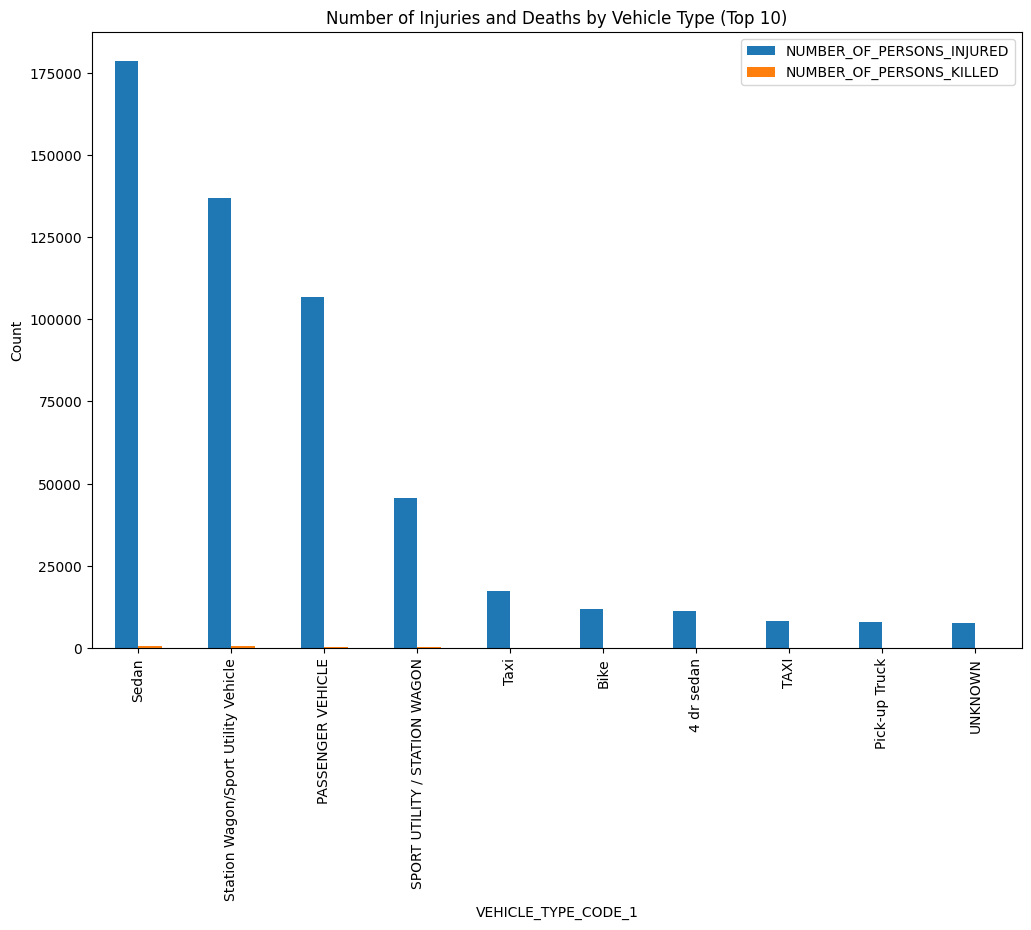

In [ ]:
location_summary = df.groupby('BOROUGH').agg({'NUMBER_OF_PERSONS_INJURED': 'sum', 'NUMBER_OF_PERSONS_KILLED': 'sum'})
print(location_summary)
# Calculate injuries and deaths by vehicle type
vehicle_summary = df.groupby('VEHICLE_TYPE_CODE_1').agg({'NUMBER_OF_PERSONS_INJURED': 'sum', 'NUMBER_OF_PERSONS_KILLED': 'sum'})
print(vehicle_summary)
import matplotlib.pyplot as plt

# Injuries and deaths by borough
location_summary.plot(kind='bar', figsize=(12, 8))
plt.ylabel('Count')
plt.title('Number of Injuries and Deaths by Borough')
plt.show()

# Injuries and deaths by vehicle type
# Due to potentially high number of unique vehicle types, let's just plot the top 10
vehicle_summary_top10 = vehicle_summary.sort_values('NUMBER_OF_PERSONS_INJURED', ascending=False).head(10)
vehicle_summary_top10.plot(kind='bar', figsize=(12, 8))
plt.ylabel('Count')
plt.title('Number of Injuries and Deaths by Vehicle Type (Top 10)')
plt.show()
